In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from decimal import *
from random import random, shuffle, uniform, randint
getcontext().prec = 40

plt.rcParams["figure.figsize"] = (10, 10)

# 1 пункт

##Градиентный спуск

In [251]:
cnt = 0

def check_points(point1, point2, eps=1e-6):
    for i in range(len(point1)):
      if abs(point1[i] - point2[i]) > eps:
        return True
    return False

def gradient_descent(lr, x, grad_f):
    global cnt
    cnt = 0
    points = [x]
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        cnt += 1
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

## Визуализация градиентного спуска и функции

In [252]:
color_arr = ['cyan', 'fuchsia', 'lime', 'coral', 'royalblue', 'plum', 'orange', 'deeppink', 'teal', 'gold'] # TODO: add more neat colors

def draw_3d_function_sign(left_limit, right_Limit, pt_arr, azim, dist, elev, function, steps, x0_sz = 1): # TODO: color begining and ending of paths with different starting point with different colors (who cares)
    t = np.linspace(left_limit, right_Limit, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    uniqe_col = len(steps)
    if (uniqe_col == 0):
        uniqe_col = 1
    ax = fig.add_subplot(projection='3d')
    my_col = cm.cool(function(X, Y)/np.amax(function(X, Y))) # color of surface
    ax.plot_surface(X, Y, function(X, Y), facecolors = my_col,
                    alpha=0.8, rstride=12, cstride=12, zorder=1) # draw function surface
    for i in range(len(pt_arr)):
        X = [p[0] for p in pt_arr[i]]
        Y = [p[1] for p in pt_arr[i]]
        Z = [function(p[0], p[1]) for p in pt_arr[i]]
        ax.plot(X, Y, Z,'.', color=color_arr[i % uniqe_col], zorder=4, markersize=4) # draw dots of gradient_descent
        if ((len(steps) == 0) or (i >= len(steps))):
            ax.plot(X, Y, Z, linewidth=0.5, color=color_arr[i % uniqe_col], zorder=4) # draw lines beetwen dots
        else:
            ax.plot(X, Y, Z, linewidth=0.5, color=color_arr[i], zorder=4, label=steps[i]) # draw lines beetwen dots
        ax.plot(X[0], Y[0], Z[0], 's', color='orangered', zorder=4, markersize=10) # draw entry point
        ax.plot(X[-1], Y[-1], Z[-1], 'X', color='orangered', zorder=4, markersize=10) # draw end point

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    if (len(steps) != 0):
        plt.legend()
    plt.show()

def draw_lines_of_level_sign(function, pt_arr, steps, x0_sz = 1):
    t = np.linspace(-50, 50, 1000)
    X, Y = np.meshgrid(t, t)
    uniqe_col = len(steps)
    if (uniqe_col == 0):
        uniqe_col = 1
    for i in range(len(pt_arr)):
        plt.plot([p[0] for p in pt_arr[i]], [p[1] for p in pt_arr[i]], 'o-', color=color_arr[i % uniqe_col], zorder=4, markersize=4) # draw dots of gradient_descent
        if ((len(steps) == 0) or (i >= len(steps))):
            plt.plot([p[0] for p in pt_arr[i]], [p[1] for p in pt_arr[i]], linewidth=0.5, color=color_arr[i % uniqe_col], zorder=4) # draw lines beetwen dots
        else:
            plt.plot([p[0] for p in pt_arr[i]], [p[1] for p in pt_arr[i]], linewidth=0.5, color=color_arr[i], zorder=4, label = steps[i]) # draw lines beetwen dots
        plt.plot(pt_arr[i][0][0], pt_arr[i][0][1], 's', color='orangered', zorder=4, markersize=10) # draw entry point
        plt.plot(pt_arr[i][-1][0], pt_arr[i][-1][1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    plt.contour(X, Y, function(X, Y), levels=np.unique(sorted([function(p[0], p[1]) for p in pt_arr[i]])))
    if (len(steps) != 0):
        plt.legend()
    plt.show()


def draw_lines_of_level_arr(function, pt_arr, x0_sz = 1):
    draw_lines_of_level_sign(function, pt_arr, [], x0_sz)

def draw_3d_function_arr(left_limit, right_Limit, pt_arr, azim, dist, elev, function, x0_sz = 1):
    draw_3d_function_sign(left_limit, right_Limit, pt_arr, azim, dist, elev, function, [], x0_sz)

def draw_lines_of_level(function, pt_arr, x0_sz = 1):
    draw_lines_of_level_sign(function, [pt_arr], [], x0_sz)

def draw_3d_function(left_limit, right_Limit, pt_arr, azim, dist, elev, function, x0_sz = 1):
    draw_3d_function_sign(left_limit, right_Limit, [pt_arr], azim, dist, elev, function, [], x0_sz)

# 2 пункт


## Метод дихотомии

Пусть задана функция $f(x):\;[a,\;b]\to\mathbb{R},\;f(x)\in\mathrm{C}([a,\;b])$.

Разобьём мысленно заданный отрезок пополам и возьмём две симметричные относительно центра точки $x_1$ и $x_2$ так, что:
\begin{array}{ccc}
x_1 &=& \frac{a+b}{2}-\delta,\\
x_2 &=& \frac{a+b}{2}+\delta,
\end{array}
где $\delta$ — некоторое число в интервале $\left(0,\;\frac{b-a}{2}\right)$.

Вычислим два значения функции $f(x)$ в двух новых точках. Сравнением определим в какой из двух новых точек значение функции $f(x)$ максимально.
Отбросим тот из концов изначального отрезка, к которому точка с максимальным значением функции оказалась ближе (напомним, мы ищем минимум), то есть:
* Если $f(x_1)>f(x_2)$, то берётся отрезок $[x_1,\;b]$, а отрезок $[a,\;x_1]$ отбрасывается.
* Иначе берётся зеркальный относительно середины отрезок $[a,\;x_2]$, а отбрасывается $[x_2,\;b]$.

Процедура повторяется, пока не будет достигнута заданная точность, к примеру, пока длина отрезка не достигнет удвоенного значения заданной погрешности.

In [253]:
def dichotomy_method(function, x, grad, eps=1e-9):
    gradient = np.array(grad(x[0], x[1]))
    a, b = 0, 100
    while abs(b - a) > eps:
        d = (b - a) / 2
        alpha1, alpha2 = a + d / 2, b - d / 2
        x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
        if function(x1[0], x1[1]) < function(x2[0], x2[1]):
            b = alpha2
        else:
            a = alpha1
    return (a + b) / 2

count = 0

def gradient_descent_with_dichotomy(f, x, grad_f, eps=1e-6):
    points = [x]
    lr = dichotomy_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = dichotomy_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

## Метод золотого сечения

Пусть задана функция $f(x):\;[a,\;b]\to\mathbb{R},\;f(x)\in\mathrm{C}([a,\;b])$. Тогда для того, чтобы найти неопределённое значение этой функции на заданном отрезке, отвечающее критерию поиска (пусть это будет минимум), рассматриваемый отрезок делится в пропорции золотого сечения в обоих направлениях, то есть выбираются две точки $x_1$ и $x_2$ такие, что: 
$\frac{b-a}{b-x_1}=\frac{b-a}{x_2-a}=\Phi=\frac{1+\sqrt{5}}{2}=1.618\ldots$, где $\Phi$ — пропорция золотого сечения.

Таким образом:
$\begin{array}{ccc}
x_1 &=& b-\frac{(b-a)}{\Phi}\\
x_2 &=& a+\frac{(b-a)}{\Phi}
\end{array}$

То есть точка $x_1$ делит отрезок $[a,\;x_2]$ в отношении золотого сечения. Аналогично $x_2$ делит отрезок $[x_1,\;b]$ в той же пропорции. Это свойство и используется для построения итеративного процесса.<br>

Шаг 1:<br>
Определяем границы поиска $l$ и $r$, затем устанавливаем текущее разбиение:<br>
$x_1 = l + \dfrac{r - l}{\varphi + 1}$<br>
$x_2 = r - \dfrac{r - l}{\varphi + 1}$<br>
и вычислим функцию на них: $f_1 = f(x_1), f_2 = f(x_2)$<br><br>

Шаг 2:<br>
если $f_1 < f_2$, тогда<br>
$r = x_2$<br>
$x_2 = x_1, f_2 = f_1$<br>
$x_1 = l + \dfrac{r - l}{\varphi + 1},\; f_1 = f(x_1)$<br>
иначе:<br>
$l = x_1$<br>
$x_1 = x_2, f_1 = f_2$<br>
$x_2 = r - \dfrac{r - l}{\varphi + 1},\; f_2 = f(x_2)$<br><br>

Шаг 3:<br>
если точность $|r - l| < \varepsilon$ нас устраивает, тогда останавливаемся, и искомая точка $x = \dfrac{l + r}{2}$, иначе назад к шагу 2

In [254]:
def golden_ratio_method(function, x, grad, eps=1e-9):
    gradient = np.array(grad(x[0], x[1]))
    a, b = 0, 1
    fi = (1 + 5 ** 0.5) / 2
    alpha1, alpha2 = b - (b - a) / fi, a + (b - a) / fi
    x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
    f1, f2 = function(x1[0], x1[1]), function(x2[0], x2[1])
    while abs(b - a) > eps:
        if f1 < f2:
          b = alpha2
          alpha2 = alpha1
          x2 = x1
          f2 = f1
          alpha1 = b - (b - a) / fi
          x1 = x - alpha1 * gradient
          f1 = function(x1[0], x1[1])
        else:
          a = alpha1
          alpha1 = alpha2
          x1 = x2
          f1 = f2
          alpha2 = a + (b - a) / fi
          x2 = x - alpha2 * gradient
          f2 = function(x2[0], x2[1])
    return (a + b) / 2

def gradient_descent_with_golden_ratio(f, x, grad_f):
    global cnt
    cnt = 0
    points = [x]
    lr = golden_ratio_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        cnt += 1
        lr = golden_ratio_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)
    return points

## Метод чисел фибоначчи

In [255]:
def fibonacci(n):
    a = 1
    b = 1
    if n == 1:
        return b
    else:
        g = a
        for i in range(1, n):
            c = a + b
            g = a
            a = b
            b = c
        return [g, a, b]

def fibonacci_method(function, x, grad, iter_number=50):
    gradient = np.array(grad(x[0], x[1]))
    a, b = 0, 100
    fib = fibonacci(iter_number)
    fib3, fib2, fib1 = fib[-3], fib[-2], fib[-1]
    alpha1, alpha2 = a + (b - a) * (fib3/fib1), a + (b - a) * (fib2/fib1)
    x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
    f1, f2 = function(x1[0], x1[1]), function(x2[0], x2[1])
    for _ in range(iter_number):
        if f1 < f2:
          b = alpha2
          alpha2 = alpha1
          x2 = x1
          f2 = f1
          alpha1 = a + (b - alpha2)
          x1 = x - alpha1 * gradient
          f1 = (function(x1[0], x1[1]))
        else:
          a = alpha1
          alpha1 = alpha2
          x1 = x2
          f1 = f2
          alpha2 = b - (alpha1 - a)
          x2 = x - alpha2 * gradient
          f2 = function(x2[0], x2[1])
    return (a + b) / 2

def gradient_descent_with_fibonacci(f, x, grad_f):
    points = [x]
    lr = fibonacci_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = fibonacci_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

# 3/4 пункт

## Функция №1
$f(x,y) = x^2+y^2-x+y+5$

In [256]:
def show_and_accumulate_gd_data(f, grad, start_x, lr_arr): #return a pair of dataframes, where 0 - iterations, 1 - function/gradient call data
    global f_cnt 
    global grad_cnt 
    data = pd.DataFrame(columns=tuple(lr_arr))
    data_call = pd.DataFrame(columns=tuple(lr_arr))
    point_arr = []

    for x in start_x:
        new_record = []
        new_call = []
        for lr in lr_arr:
            points = gradient_descent(lr, x, grad)
            point_arr.append(points)
            new_record.append(cnt)
            new_call.append(str([f_cnt, grad_cnt]))
            f_cnt = 0
            grad_cnt = 0
            print(points[-1])
        data.loc[str(x)] = new_record
        data_call.loc[str(x)] = new_call

    draw_3d_function_sign(-50, 50, point_arr, -40, 8, 40, f, lr_arr, len(start_x))
    draw_lines_of_level_sign(f, point_arr, lr_arr, len(start_x))
    return [data, data_call]

def show_and_accumulate_golden_ratio_data(f, grad, start_x):
    global f_cnt 
    global grad_cnt 
    data = pd.DataFrame(columns=tuple(["iterations", "function/gradient calls"]))
    point_arr = []

    for x in start_x:
        points = gradient_descent_with_golden_ratio(f, x, grad)
        point_arr.append(points)
        data.loc[str(tuple(x))] = [cnt, str(tuple([f_cnt, grad_cnt]))]
        grad_cnt = 0
        f_cnt = 0
        print(points[-1])

    draw_3d_function_arr(-50, 50, point_arr, -40, 8, 40, f, len(start_x))
    draw_lines_of_level_arr(f, point_arr, len(start_x))
    return data

# counters for function & gradient calls
f_cnt = 0
grad_cnt = 0

In [257]:
def f1(x, y):
    global f_cnt
    f_cnt += 1
    return x ** 2 + y ** 2 - x + y + 5

def grad1(x, y):
    global grad_cnt
    grad_cnt += 1
    return [2 * x - 1, 2 * y + 1]

f1_start_points = [[-100/3, -100/3], [1, 5], [102, 23], [-12, 4]]

### обычный градиентный спуск

[ 0.49999644 -0.50000346]
[ 0.49999903 -0.50000094]
[ 0.49999963 -0.50000036]
[ 0.49999986 -0.50000013]
[ 0.5 -0.5]
[ 0.49999986 -0.50000013]
[ 0.50000015 -0.49999986]
[ 0.49999965 -0.50000034]
[ 0.50000031 -0.49999655]
[ 0.50000011 -0.49999878]
[ 0.50000003 -0.49999962]
[ 0.50000001 -0.49999989]
[ 0.5 -0.5]
[ 0.49999999 -0.50000011]
[ 0.49999999 -0.50000015]
[ 0.49999998 -0.50000026]
[ 0.5000035  -0.49999919]
[ 0.50000105 -0.49999976]
[ 0.50000045 -0.4999999 ]
[ 0.50000008 -0.49999998]
[ 0.5 -0.5]
[ 0.49999992 -0.50000002]
[ 0.50000018 -0.49999996]
[ 0.49999977 -0.50000005]
[ 0.49999679 -0.49999884]
[ 0.49999901 -0.49999964]
[ 0.49999966 -0.49999988]
[ 0.49999995 -0.49999998]
[ 0.5 -0.5]
[ 0.49999995 -0.49999998]
[ 0.49999986 -0.49999995]
[ 0.49999964 -0.49999987]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


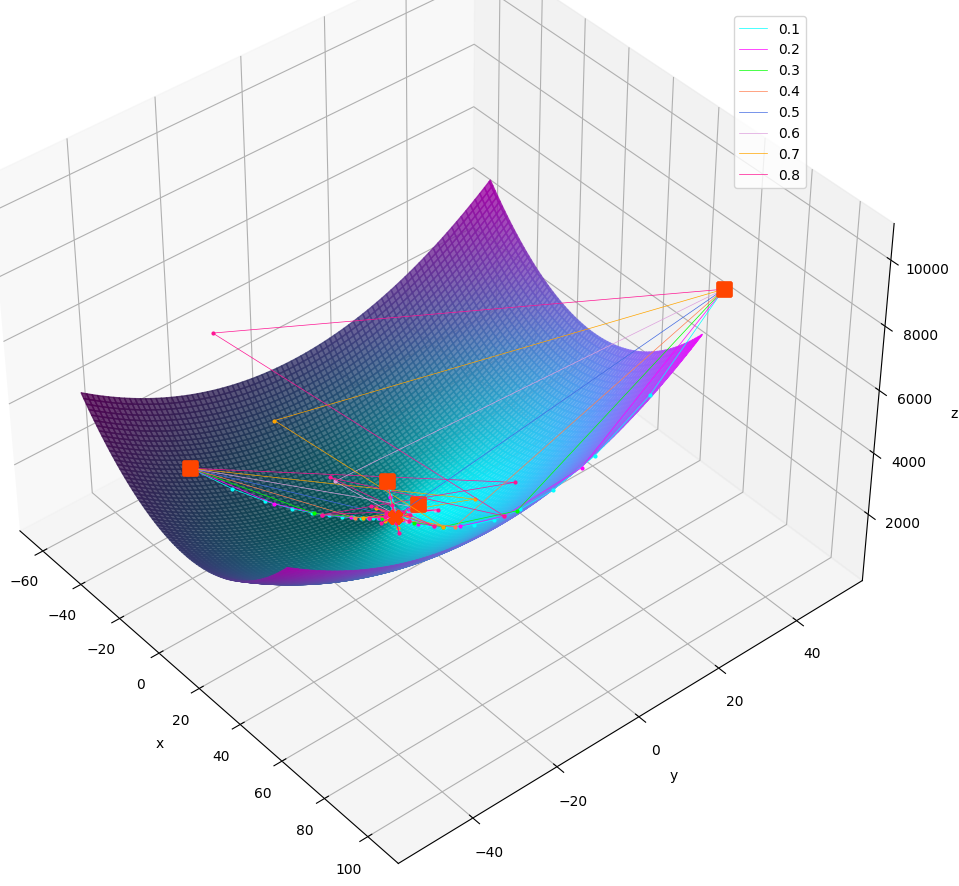

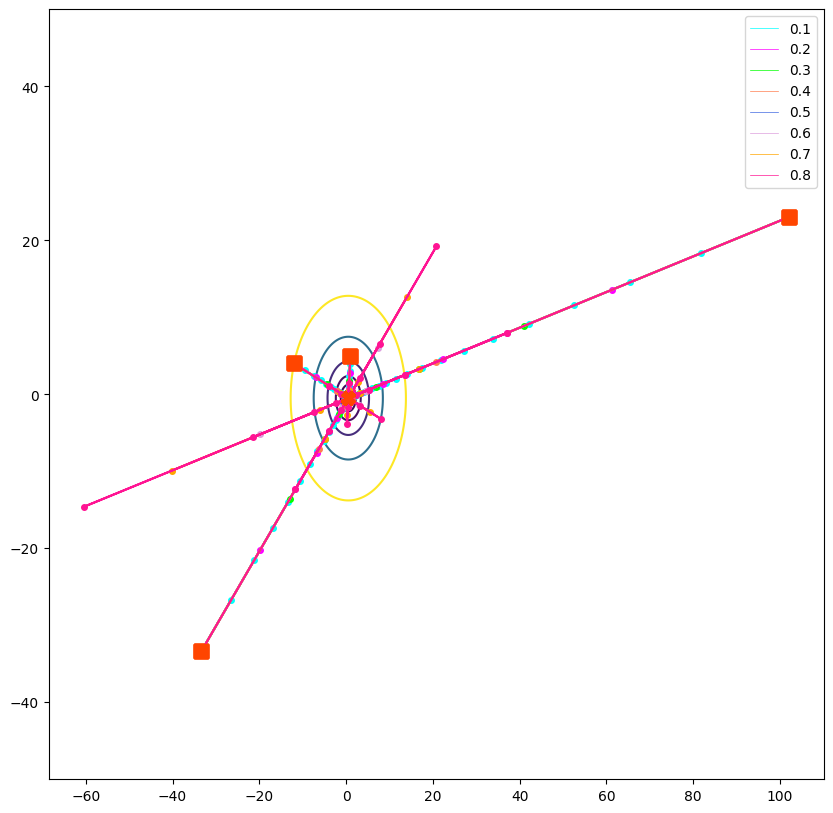

0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
[-33.333333333333336, -33.333333333333336]   71   33   19   11    1   11   20   
[1, 5]                                       63   29   17   10    1   10   18   
[102, 23]                                    76   35   20   12    1   12   21   
[-12, 4]                                     67   31   18   11    1   11   19   

                                            0.8  
[-33.333333333333336, -33.333333333333336]   35  
[1, 5]                                       32  
[102, 23]                                    38  
[-12, 4]                                     33

In [258]:
f1_res = show_and_accumulate_gd_data(f1, grad1, f1_start_points, [lr/10 for lr in range(1,9)]) # при 0.9 - расходимся пацаны
f1_res[0]

In [259]:
f1_res[1]

0.1      0.2      0.3  \
[-33.333333333333336, -33.333333333333336]  [0, 72]  [0, 34]  [0, 20]   
[1, 5]                                      [0, 64]  [0, 30]  [0, 18]   
[102, 23]                                   [0, 77]  [0, 36]  [0, 21]   
[-12, 4]                                    [0, 68]  [0, 32]  [0, 19]   

                                                0.4     0.5      0.6      0.7  \
[-33.333333333333336, -33.333333333333336]  [0, 12]  [0, 2]  [0, 12]  [0, 21]   
[1, 5]                                      [0, 11]  [0, 2]  [0, 11]  [0, 19]   
[102, 23]                                   [0, 13]  [0, 2]  [0, 13]  [0, 22]   
[-12, 4]                                    [0, 12]  [0, 2]  [0, 12]  [0, 20]   

                                                0.8  
[-33.333333333333336, -33.333333333333336]  [0, 36]  
[1, 5]                                      [0, 33]  
[102, 23]                                   [0, 39]  
[-12, 4]                                    [0, 34]

### градиентный спуск с золотым сечением

[ 0.49999999 -0.50000001]
[ 0.5        -0.49999998]
[ 0.50000002 -0.5       ]
[ 0.49999998 -0.49999999]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


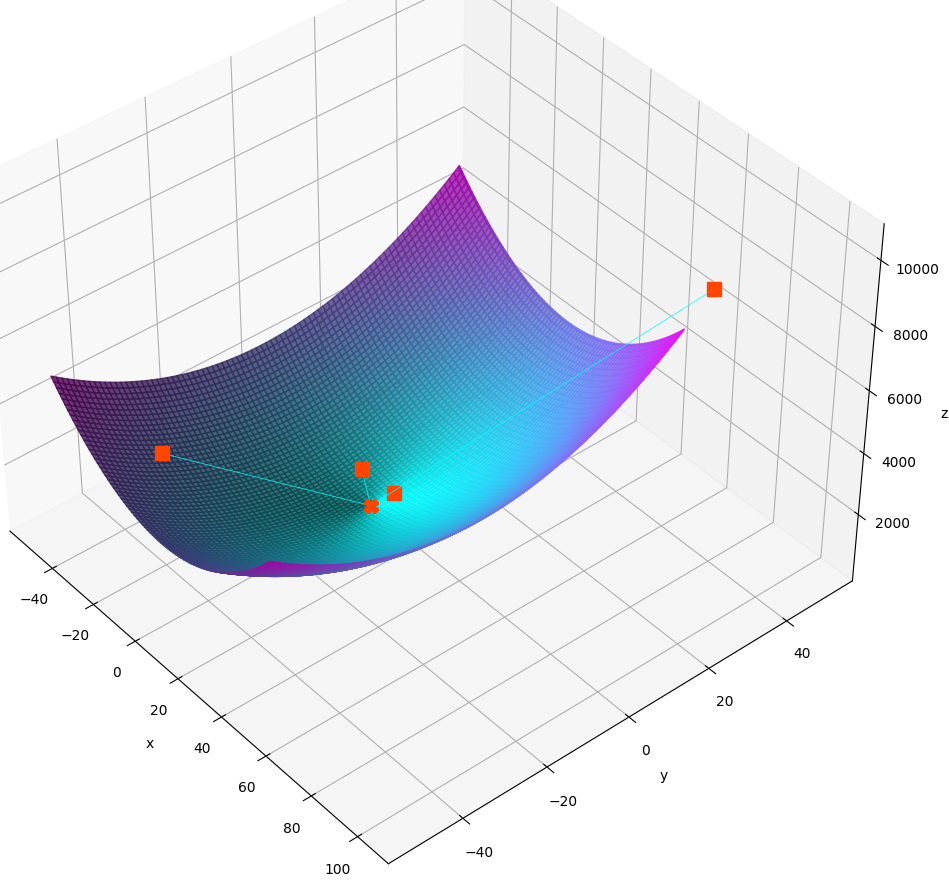

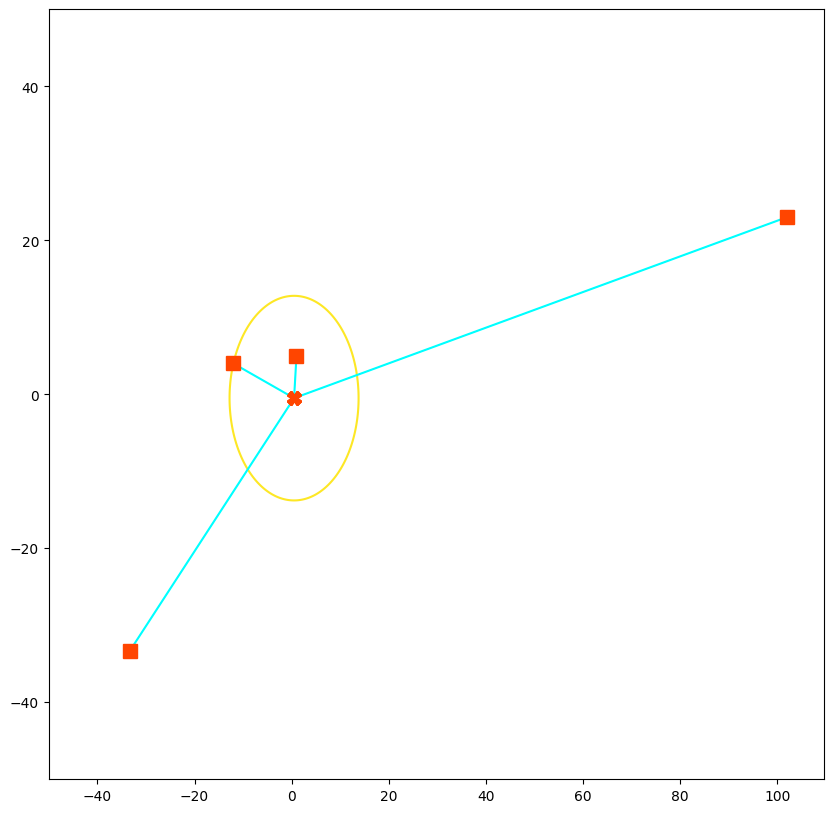

iterations function/gradient calls
(-33.333333333333336, -33.333333333333336)           1                (982, 4)
(1, 5)                                               1                 (92, 4)
(102, 23)                                            1                 (92, 4)
(-12, 4)                                             1                 (92, 4)

In [260]:
f1_golden_res = show_and_accumulate_golden_ratio_data(f1, grad1, f1_start_points)
f1_golden_res

##Функция №2
$f(x,y) = \frac{xy}{100}+\frac{y^2}{100}+\frac{x^2}{100}$

In [261]:
def f2(x, y):
    global f_cnt
    f_cnt += 1
    return x * y /100 + (y ** 2) / 100 + (x ** 2) / 100

def grad2(x, y):
    global grad_cnt 
    grad_cnt += 1
    return [(2 * x + y) / 100, 2 * (x + 2 * y) / 100]

f2_start_points = [[-40, 1], [-30, -2], [324, 1], [20, -4]]

### обычный градиентный спуск

[-7.74512132e-05  5.66982231e-05]
[-1.44461806e-05  1.05753382e-05]
[-7.45475908e-06  5.45726240e-06]
[-4.97938380e-06  3.64516194e-06]
[-3.50083780e-06  2.56279114e-06]
[-2.37879925e-06  1.74140192e-06]
[-1.65112696e-06  1.20870883e-06]
[-1.37068620e-06  1.00341195e-06]
[-4.99288076e-07  5.17563182e-07]
[1.18056872e-07 3.22537374e-07]
[-7.72592659e-05  5.65577080e-05]
[-1.45329134e-05  1.06388310e-05]
[-6.88740527e-06  5.04193059e-06]
[-4.32293580e-06  3.16460864e-06]
[-3.23581571e-06  2.36878151e-06]
[-2.35070117e-06  1.72083269e-06]
[-1.75278236e-06  1.28312574e-06]
[-1.57179094e-06  1.15063082e-06]
[-7.43422605e-07  3.14816120e-07]
[-1.33210000e-07 -3.63936486e-07]
[ 7.75793438e-05 -5.67920213e-05]
[ 1.42416977e-05 -1.04256463e-05]
[ 7.61873886e-06 -5.57730394e-06]
[ 4.59717635e-06 -3.36536666e-06]
[ 3.15711734e-06 -2.31117030e-06]
[ 2.18349711e-06 -1.59843082e-06]
[ 1.96771633e-06 -1.44046832e-06]
[ 1.11064172e-06 -8.13046171e-07]
[ 9.22126482e-07 -4.48243893e-07]
[1.33783331e-07 

/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


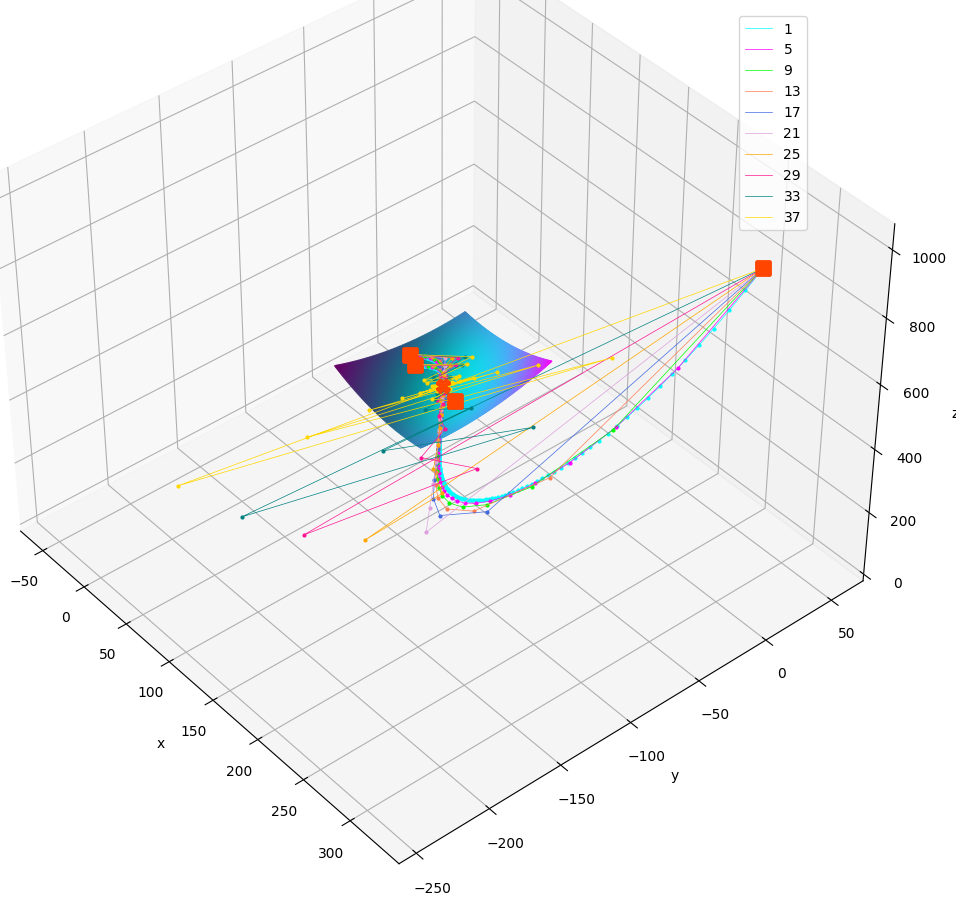

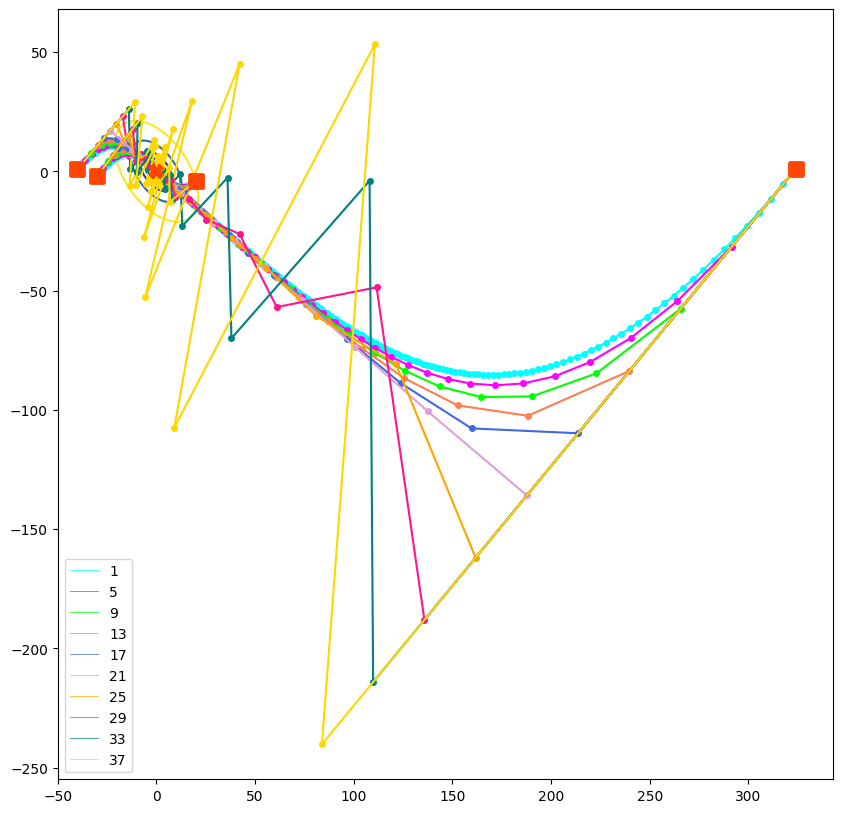

1    5    9   13  17  21  25  29  33  37
[-40, 1]   1012  222  125  86  65  52  43  36  32  62
[-30, -2]   987  217  123  85  64  51  42  35  31  61
[324, 1]   1175  254  142  98  74  59  48  41  35  69
[20, -4]    963  213  120  83  63  50  41  35  30  58

In [262]:
f2_res = show_and_accumulate_gd_data(f2, grad2, f2_start_points, [lr for lr in range(1, 40, 4)])
f2_res[0]

### градиентный спус с золотым сечением

In [263]:
f2_res[1]

1         5         9        13       17       21       25  \
[-40, 1]   [19, 1013]  [0, 223]  [0, 126]  [0, 87]  [0, 66]  [0, 53]  [0, 44]   
[-30, -2]    [0, 988]  [0, 218]  [0, 124]  [0, 86]  [0, 65]  [0, 52]  [0, 43]   
[324, 1]    [0, 1176]  [0, 255]  [0, 143]  [0, 99]  [0, 75]  [0, 60]  [0, 49]   
[20, -4]     [0, 964]  [0, 214]  [0, 121]  [0, 84]  [0, 64]  [0, 51]  [0, 42]   

                29       33       37  
[-40, 1]   [0, 37]  [0, 33]  [0, 63]  
[-30, -2]  [0, 36]  [0, 32]  [0, 62]  
[324, 1]   [0, 42]  [0, 36]  [0, 70]  
[20, -4]   [0, 36]  [0, 31]  [0, 59]

[-7.74512135e-05  5.66982234e-05]
[-7.72592662e-05  5.65577082e-05]
[ 7.75793442e-05 -5.67920215e-05]
[ 7.69617987e-05 -5.63399469e-05]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


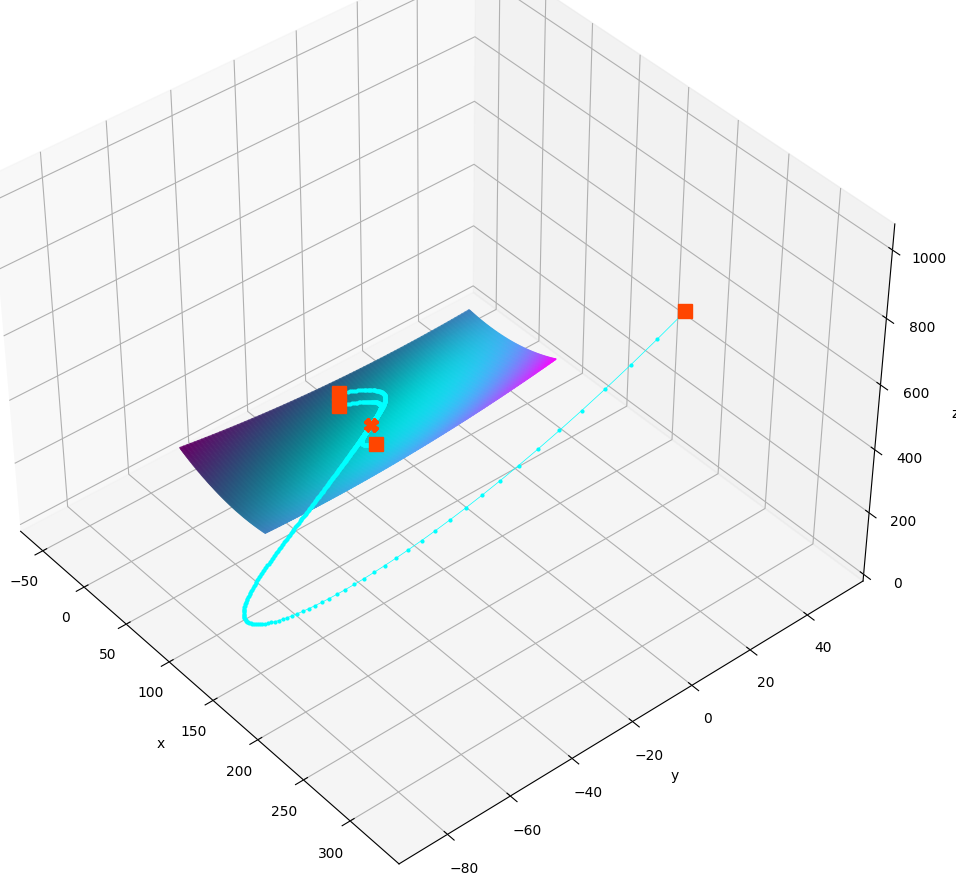

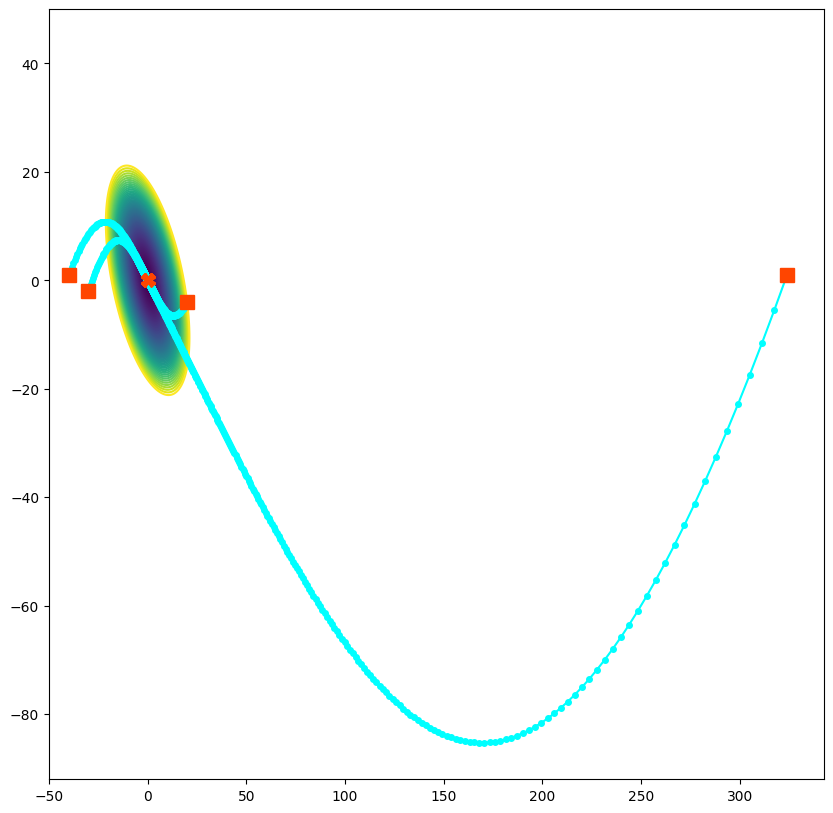

iterations function/gradient calls
(-40, 1)         1012           (53824, 2026)
(-30, -2)         987           (45448, 1976)
(324, 1)         1175           (54096, 2352)
(20, -4)          963           (44344, 1928)

In [264]:
f2_golden_res = show_and_accumulate_golden_ratio_data(f2, grad2, f2_start_points)
f2_golden_res

##Функция №3
$f(x, y) = x^2+2xy+3y^2$

In [265]:
def f3(x, y):
    global f_cnt
    f_cnt += 1
    return x**2 + 2*x*y + 3*y**2


def grad3(x, y):
    global grad_cnt
    grad_cnt += 1
    return [2 * x + 2*y, 2*x + 6*y]

f3_start_points = [[-40, -40], [39, 38], [-23, 43], [-122, 44]]

### обычный градиентный спуск

[-4.87159851e-06  2.01788217e-06]
[-4.26453165e-06  1.76642685e-06]
[-3.25355456e-06  1.34766643e-06]
[-2.88404764e-06  1.19461165e-06]
[-2.75622051e-06  1.14166392e-06]
[-1.87996669e-06  7.95159194e-07]
[1.72144839e-07 4.15766313e-07]
[1.80353674e-07 4.35412285e-07]
[ 4.83592706e-06 -2.00310657e-06]
[ 4.23330534e-06 -1.75349248e-06]
[ 3.22973096e-06 -1.33779837e-06]
[ 2.86292969e-06 -1.18586431e-06]
[ 2.73603855e-06 -1.13330428e-06]
[ 2.61294044e-06 -1.05766160e-06]
[-1.64795949e-07 -3.98023266e-07]
[1.89324834e-07 4.57070583e-07]
[-4.95722599e-06  2.05335024e-06]
[-3.98472951e-06  1.65052900e-06]
[-3.52874801e-06  1.46165528e-06]
[-2.94498490e-06  1.21985269e-06]
[-2.64483691e-06  1.09552732e-06]
[-2.35878675e-06  9.83260261e-07]
[-1.69702068e-07 -4.09077849e-07]
[-1.85520627e-07 -4.47886413e-07]
[-4.86022848e-06  2.01317255e-06]
[-3.94041153e-06  1.63217190e-06]
[-3.71000771e-06  1.53673551e-06]
[-2.66306929e-06  1.10307942e-06]
[-2.75839527e-06  1.14256473e-06]
[-2.16591698e-06  8.

/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


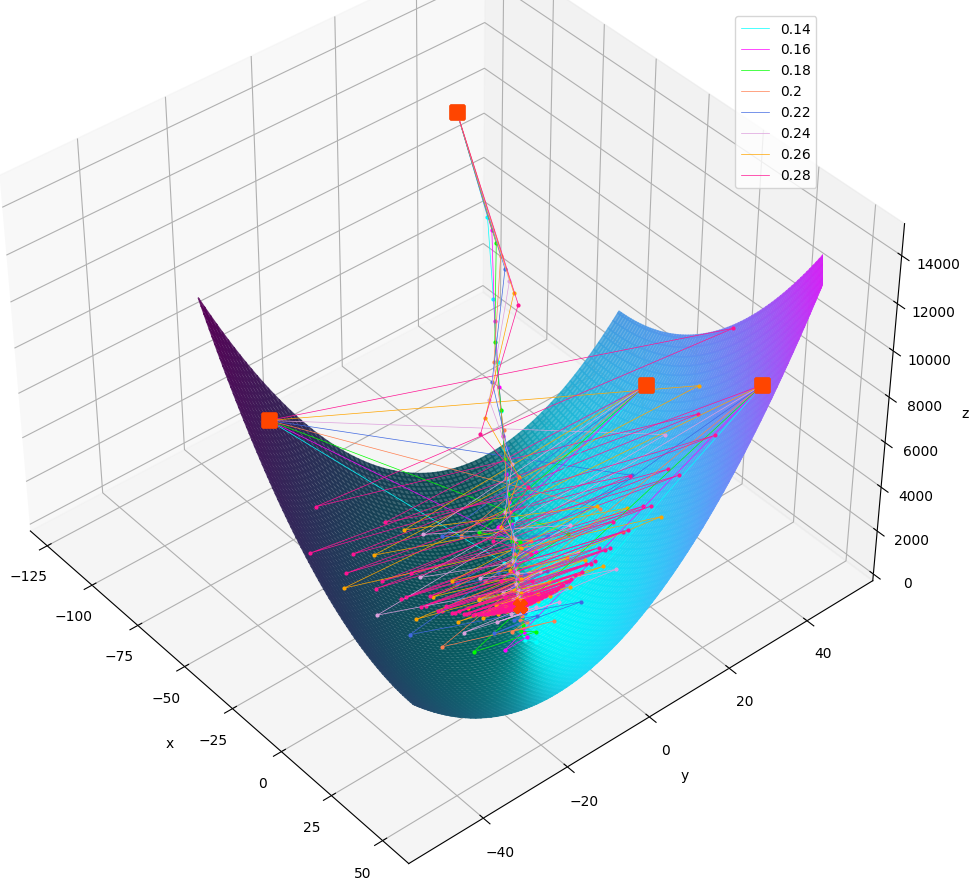

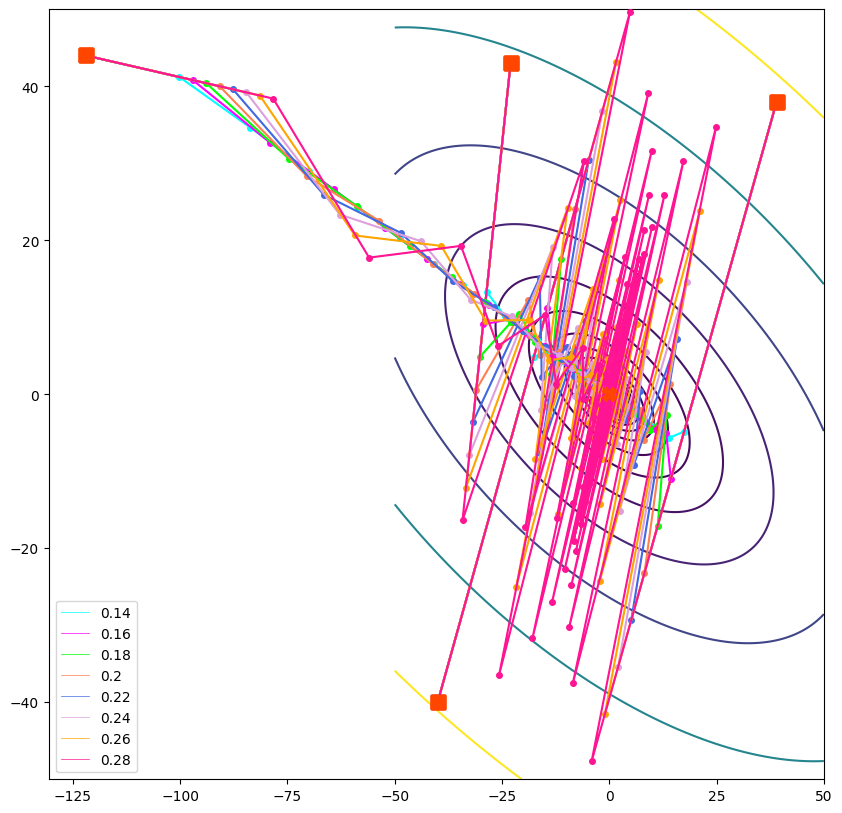

0.14  0.16  0.18  0.20  0.22  0.24  0.26  0.28
[-40, -40]    84    73    65    58    52    48    72   200
[39, 38]      84    73    65    58    52    47    72   199
[-23, 43]     87    76    67    60    54    49    70   194
[-122, 44]    94    82    72    65    58    53    64   176

In [266]:
f3_res = show_and_accumulate_gd_data(f3, grad3, f3_start_points, [lr/100 for lr in range(14, 30, 2)])
f3_res[0]

### градиентный спуск с методом золотого сечения

In [267]:
f3_res[1]

0.14     0.16     0.18     0.20     0.22     0.24     0.26  \
[-40, -40]  [5114, 85]  [0, 74]  [0, 66]  [0, 59]  [0, 53]  [0, 49]  [0, 73]   
[39, 38]       [0, 85]  [0, 74]  [0, 66]  [0, 59]  [0, 53]  [0, 48]  [0, 73]   
[-23, 43]      [0, 88]  [0, 77]  [0, 68]  [0, 61]  [0, 55]  [0, 50]  [0, 71]   
[-122, 44]     [0, 95]  [0, 83]  [0, 73]  [0, 66]  [0, 59]  [0, 54]  [0, 65]   

                0.28  
[-40, -40]  [0, 201]  
[39, 38]    [0, 200]  
[-23, 43]   [0, 195]  
[-122, 44]  [0, 177]

[-4.77373962e-08  2.04588837e-08]
[ 6.73365913e-08 -2.88944337e-08]
[-5.42469792e-07  2.02222457e-07]
[-6.24680698e-07  2.25294653e-07]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


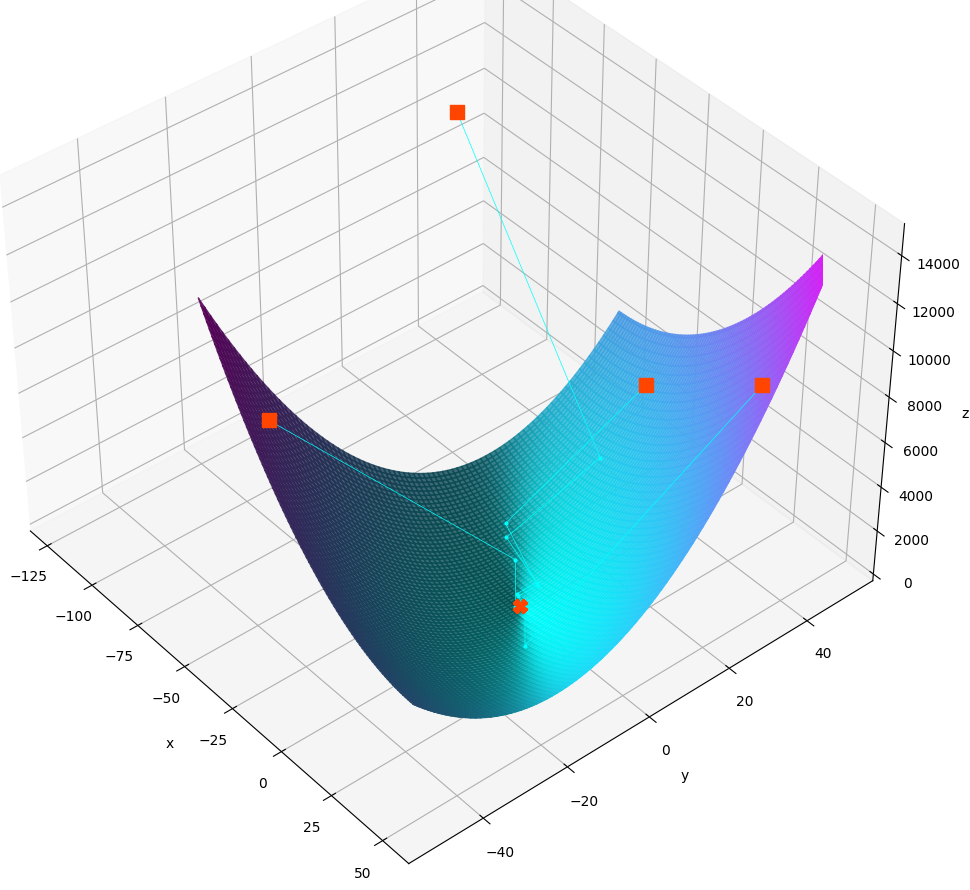

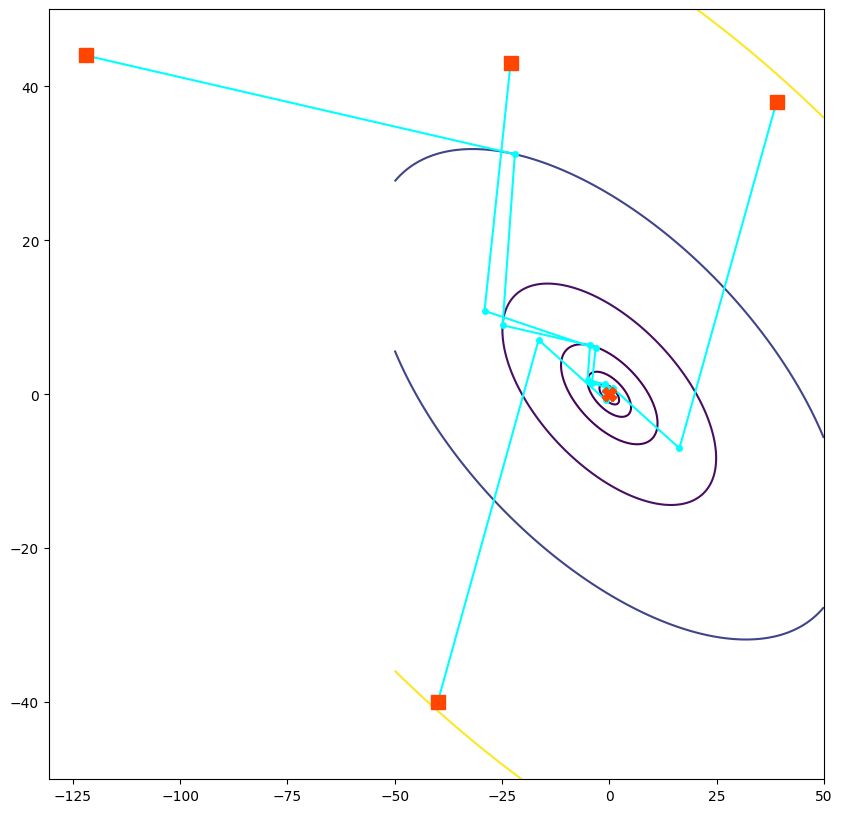

iterations function/gradient calls
(-40, -40)          10              (3375, 22)
(39, 38)            10               (506, 22)
(-23, 43)           18               (874, 38)
(-122, 44)          23              (1104, 48)

In [268]:
f3_golden_res = show_and_accumulate_golden_ratio_data(f3, grad3, f3_start_points)
f3_golden_res

### Пункт 4.d - scaling


Рассмотрим норм функцию x^2 + y^2 и ее растянутую версию 100x^2 + y^2
<br>
Посторим графики и проанализируем все метрики, предложенные в прошлых пунктах, у обоих версий функций с градиентным спуском с и без линейного поиска

In [269]:
def f4(x, y):
    global f_cnt
    f_cnt += 1
    return x**2 + y**2

def grad4(x, y):
    global grad_cnt
    grad_cnt += 1
    return [2*x, 2*y]

def f4_sc(x, y):
    global f_cnt
    f_cnt += 1
    return 10*x**2 + y**2

def grad4_sc(x, y):
    global grad_cnt
    grad_cnt += 1
    return [20*x, 2*y]

f4_start_points = [[-40, -40], [40, 50], [-23, 43], [32, 14], [55, 2]] 
f4_lr = [lr/100 for lr in range(1, 5)]

[-4.88017064e-05 -4.88017064e-05]
[-2.39476437e-05 -2.39476437e-05]
[-1.51222705e-05 -1.51222705e-05]
[-1.11598085e-05 -1.11598085e-05]
[3.90770563e-05 4.88463204e-05]
[1.87452047e-05 2.34315058e-05]
[1.18066969e-05 1.47583712e-05]
[8.69000893e-06 1.08625112e-05]
[-2.58825556e-05  4.83891257e-05]
[-1.26903354e-05  2.37254096e-05]
[-8.17358719e-06  1.52810543e-05]
[-5.90353868e-06  1.10370506e-05]
[4.87571332e-05 2.13312458e-05]
[2.34961448e-05 1.02795634e-05]
[1.54951425e-05 6.77912484e-06]
[1.14652425e-05 5.01604360e-06]
[4.85685253e-05 1.76612819e-06]
[2.37539233e-05 8.63779031e-07]
[1.52601558e-05 5.54914757e-07]
[1.09928613e-05 3.99740411e-07]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


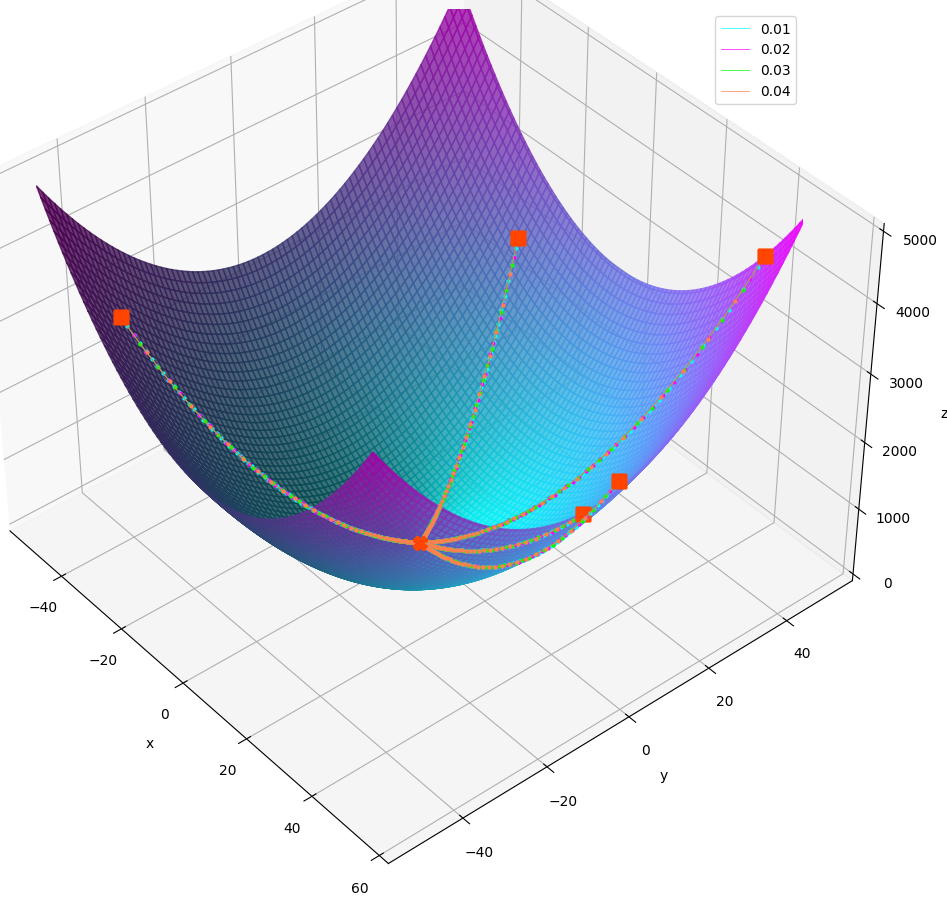

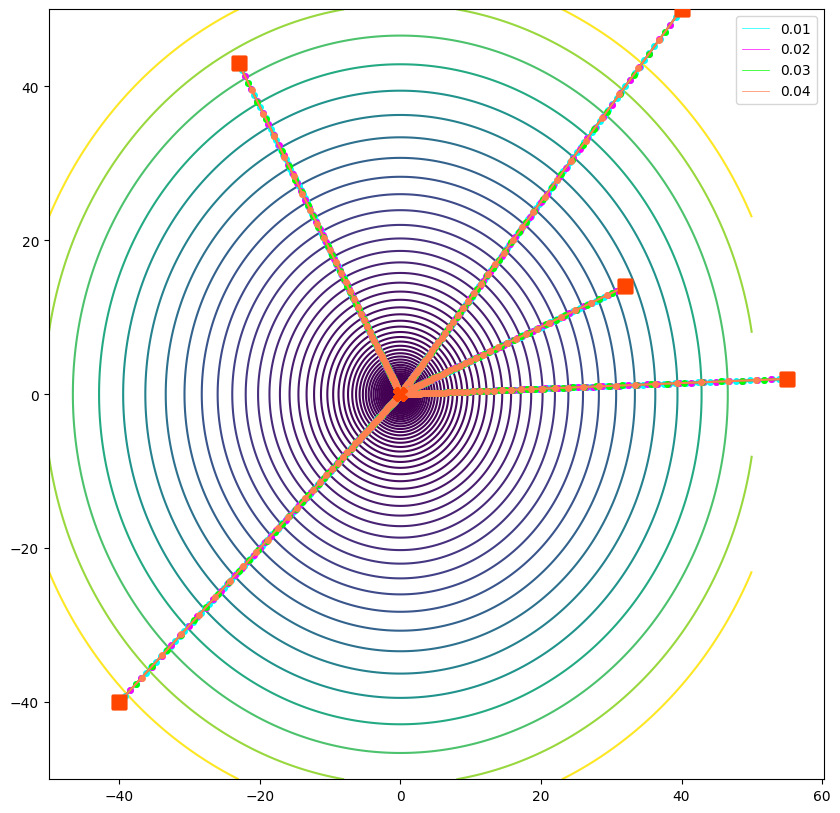

In [270]:
f4_res = show_and_accumulate_gd_data(f4, grad4, f4_start_points, f4_lr)

[-2.37244664e-18 -2.37244664e-18]
[2.37244664e-18 2.96555830e-18]
[-1.36415649e-18  2.55037981e-18]
[-1.89795764e-18 -8.30356986e-19]
[3.26211579e-18 1.18622353e-19]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


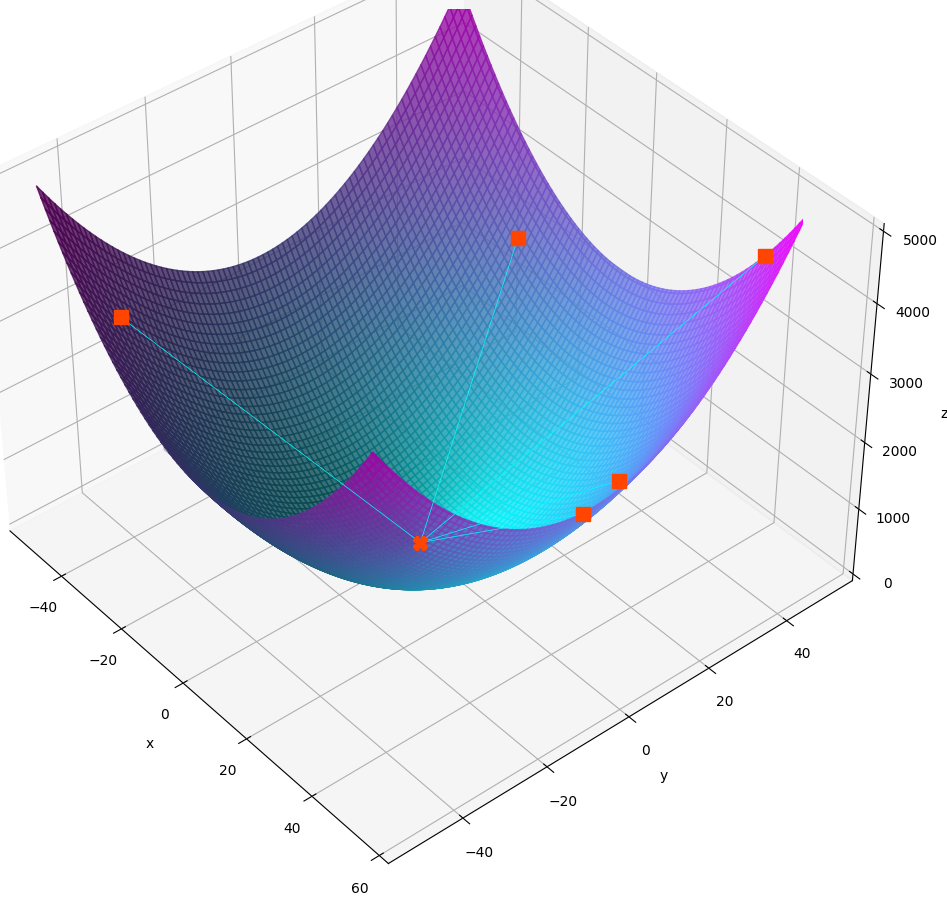

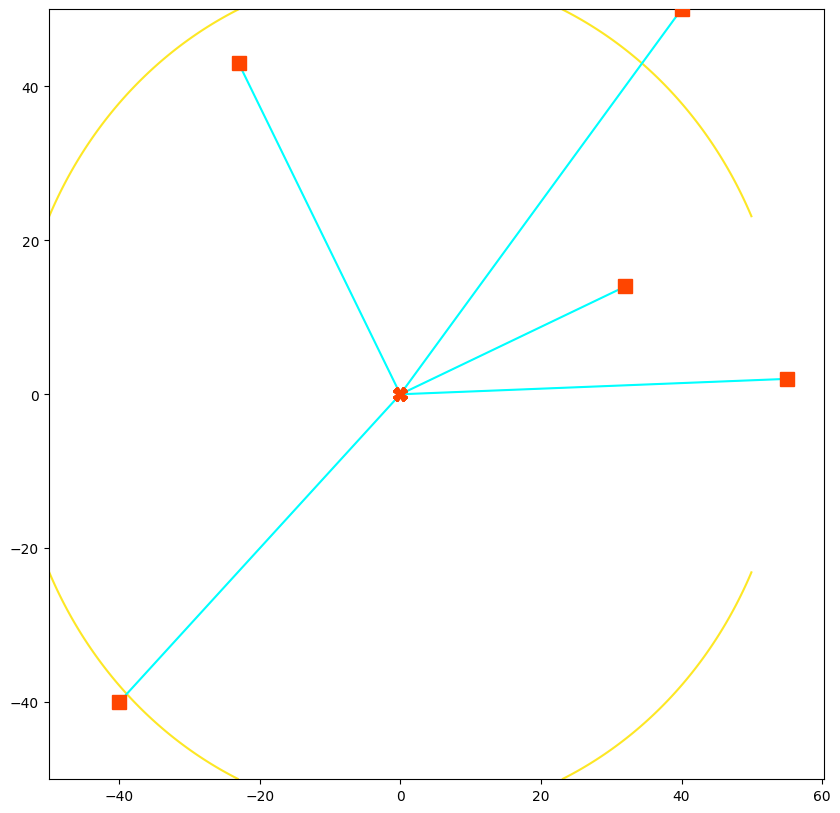

In [271]:
f4_golden_res = show_and_accumulate_golden_ratio_data(f4, grad4, f4_start_points)

[-1.92624367e-64 -4.88017064e-05]
[-5.40939725e-77 -2.39476437e-05]
[-3.12174855e-94 -1.51222705e-05]
[-1.22599643e-125 -1.11598085e-005]
[1.65463071e-65 4.88463204e-05]
[2.52380838e-78 2.34315058e-05]
[7.99167629e-96 1.47583712e-05]
[9.80797146e-128 1.08625112e-005]
[-4.53668908e-65  4.83891257e-05]
[-1.11974523e-77  2.37254096e-05]
[-7.18002167e-95  1.52810543e-05]
[-1.40989590e-126  1.10370506e-005]
[1.68702643e-59 4.88367907e-05]
[1.52215053e-71 2.32568026e-05]
[1.45367745e-87 1.51534505e-05]
[2.39452428e-117 1.06235791e-005]
[5.83036639e-50 4.85227951e-05]
[1.16522635e-60 2.35739729e-05]
[5.41777585e-75 1.47383896e-05]
[2.45308197e-100 1.12270320e-005]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


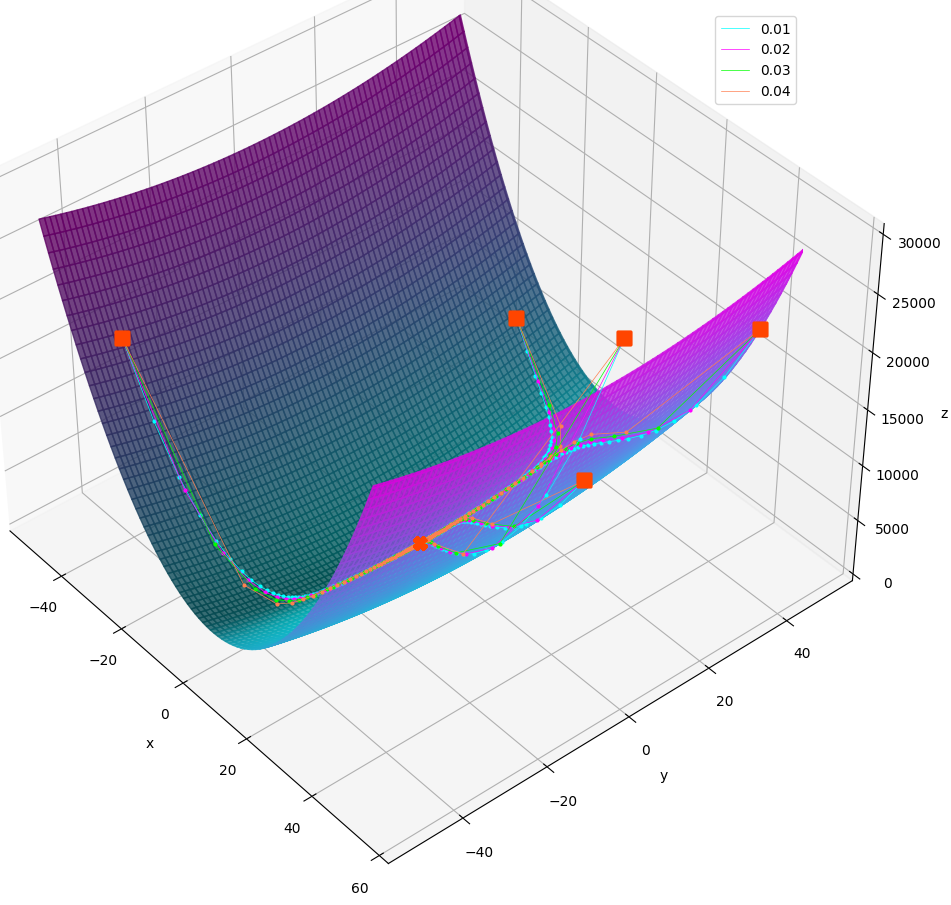

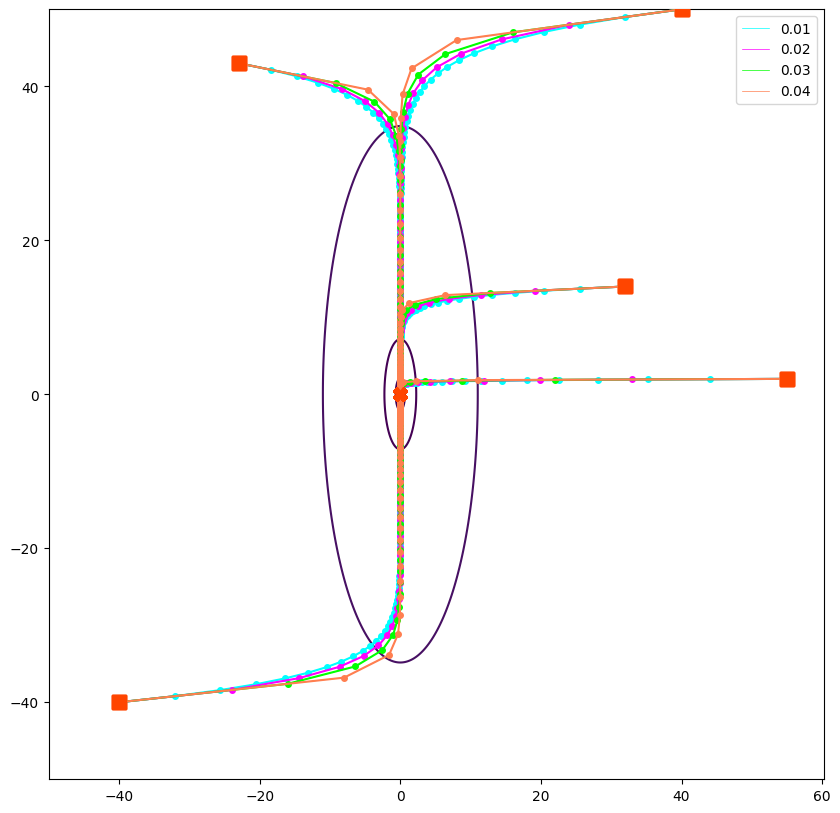

In [272]:
f4_res_sc = show_and_accumulate_gd_data(f4_sc, grad4_sc, f4_start_points, f4_lr)

[ 4.19252012e-09 -4.19251997e-07]
[-1.14299926e-08  9.14399513e-07]
[2.40380525e-08 1.28575553e-06]
[2.60477632e-08 1.13959017e-08]
[-7.52018668e-12  2.06740415e-08]


/tmp/ipykernel_1168/4247060566.py:30: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


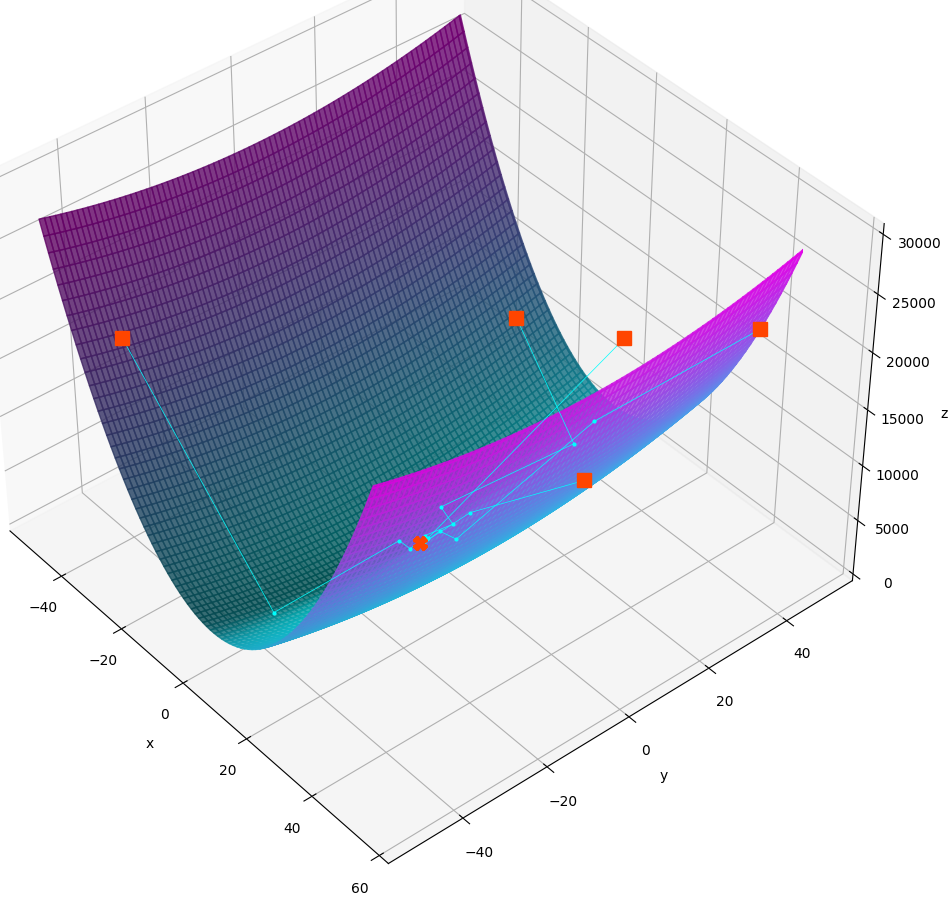

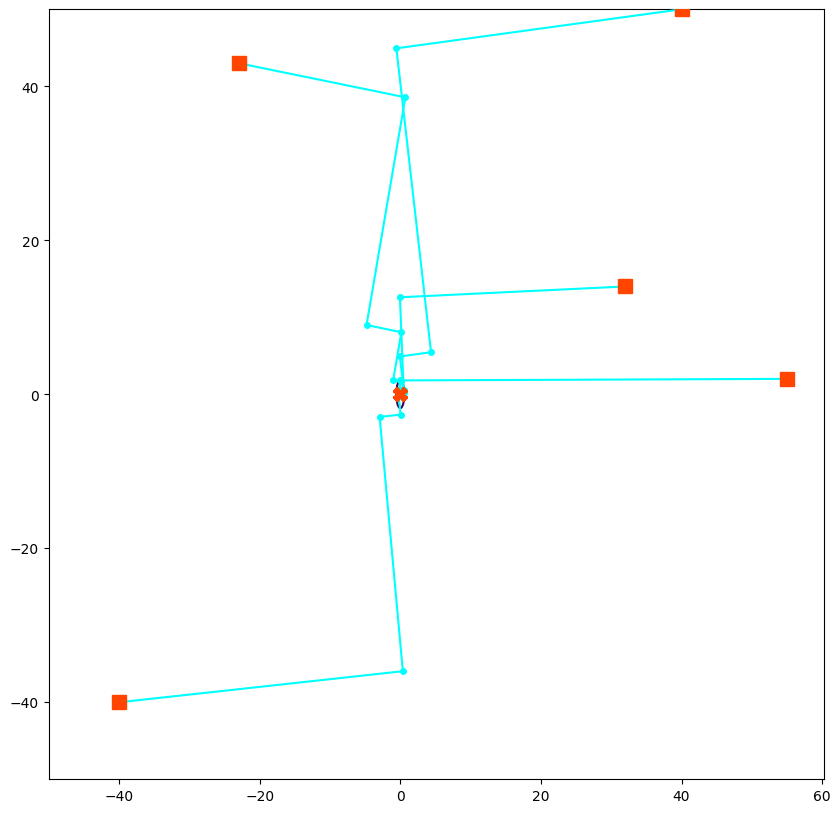

In [273]:
f4_golden_res_sc = show_and_accumulate_golden_ratio_data(f4_sc, grad4_sc, f4_start_points)

In [274]:
f4_res[0]

0.01  0.02  0.03  0.04
[-40, -40]   673   350   238   180
[40, 50]     684   356   242   183
[-23, 43]    677   352   239   181
[32, 14]     662   345   234   177
[55, 2]      689   358   243   184

In [275]:
f4_res_sc[0]

0.01  0.02  0.03  0.04
[-40, -40]   673   350   238   180
[40, 50]     684   356   242   183
[-23, 43]    677   352   239   181
[32, 14]     621   325   221   168
[55, 2]      525   277   190   144

In [276]:
f4_res[1]

0.01      0.02      0.03      0.04
[-40, -40]  [98, 674]  [0, 351]  [0, 239]  [0, 181]
[40, 50]     [0, 685]  [0, 357]  [0, 243]  [0, 184]
[-23, 43]    [0, 678]  [0, 353]  [0, 240]  [0, 182]
[32, 14]     [0, 663]  [0, 346]  [0, 235]  [0, 178]
[55, 2]      [0, 690]  [0, 359]  [0, 244]  [0, 185]

In [277]:
f4_res_sc[1]

0.01      0.02      0.03      0.04
[-40, -40]  [22, 674]  [0, 351]  [0, 239]  [0, 181]
[40, 50]     [0, 685]  [0, 357]  [0, 243]  [0, 184]
[-23, 43]    [0, 678]  [0, 353]  [0, 240]  [0, 182]
[32, 14]     [0, 622]  [0, 326]  [0, 222]  [0, 169]
[55, 2]      [0, 526]  [0, 278]  [0, 191]  [0, 145]

In [278]:
f4_golden_res

iterations function/gradient calls
(-40, -40)           1               (7569, 4)
(40, 50)             1                 (92, 4)
(-23, 43)            1                 (92, 4)
(32, 14)             1                 (92, 4)
(55, 2)              1                 (92, 4)

In [279]:
f4_golden_res_sc

iterations function/gradient calls
(-40, -40)          14              (7706, 30)
(40, 50)            16               (782, 34)
(-23, 43)           22              (1058, 46)
(32, 14)             9               (460, 20)
(55, 2)              4               (230, 10)

# 5 пункт

## Генерация функции от n переменных с числом обусловленности k

In [280]:
def generate_function(n, k):
  diagonal = []
  min = random() * ((n ** 2) / 31)
  max = k * min
  diagonal.append(max)
  diagonal.append(min)
  for i in range(2, n):
    diagonal.append(uniform(min, max))
  shuffle(diagonal)
  return diagonal

def random_function(x, diagonal):
  sum = 0
  for i in range(len(diagonal)):
    sum += x[i] * x[i] * diagonal[i]
  return sum

## Генерация градиента функции от n переменных с числом обусловленности k

In [281]:
def grad_random_function(x, diagonal):
  grad = [0] * len(x)
  for i in range(len(x)):
    grad[i] = 2 * diagonal[i] * x[i]
  return grad

# 6 пункт

### <для тестов>

In [282]:
def draw_3d_function(left_limit, right_Limit, points, azim, dist, elev, function, diag):
    t = np.linspace(left_limit, right_Limit, 1000)
    X, Y = np.meshgrid(t, t)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    my_col = cm.cool(function([X, Y], diag)/np.amax(function([X, Y], diag))) # color of surface
    ax.plot_surface(X, Y, function([X, Y], diag), facecolors = my_col,
                    alpha=0.8, rstride=12, cstride=12, zorder=1) # draw function surface
    X = [p[0] for p in points]
    Y = [p[1] for p in points]
    Z = [function([p[0], p[1]], diag) for p in points]
    ax.plot(X, Y, Z,'.', color='salmon', zorder=4, markersize=4) # draw dots of gradient_descent
    ax.plot(X, Y, Z, linewidth=0.5, color='salmon', zorder=4) # draw lines beetwen dots
    ax.plot(X[0], Y[0], Z[0], 's', color='orangered', zorder=4, markersize=10) # draw entry point
    ax.plot(X[-1], Y[-1], Z[-1], 'X', color='orangered', zorder=4, markersize=10) # draw end point
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.azim = azim
    ax.dist = dist
    ax.elev = elev
    plt.show()

## Градиентный спуск для многомерного случая


In [283]:
def check_points(point1, point2, eps=1e-6):
    for i in range(len(point1)):
      if abs(point1[i] - point2[i]) > eps:
        return True
    return False

def gradient_descent(lr, x, grad_f, diag):
    points = [x]
    x = x - lr * np.array(grad_f(x, diag))
    points.append(x)
    while check_points(points[-2], points[-1]):
        x = x - lr * np.array(grad_f(x, diag))
        points.append(x)

    return points

### тестинг

[-0.00012504  0.        ]


/tmp/ipykernel_1168/2778789669.py:20: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


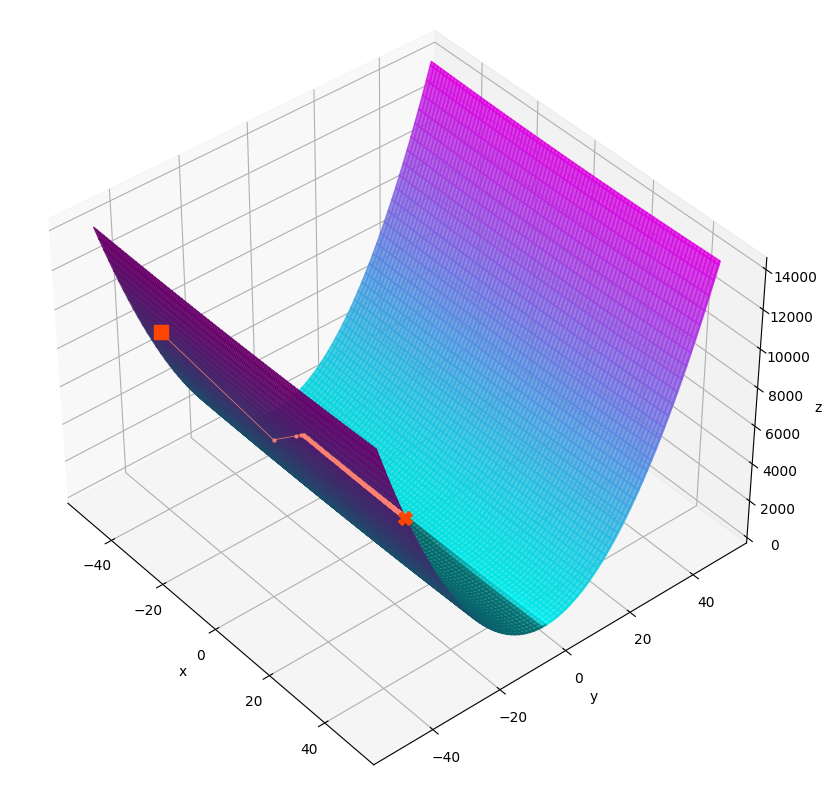

In [284]:
lr = 0.07
x = [-40, -40]

diag = generate_function(2, 100)
points = gradient_descent(lr, x, grad_func, diag)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 10, 40, function, diag)

## Градиентный спуск на основе золотого сечения для многомерного случая

In [285]:
def golden_ratio_method_multidim(function, x, grad, diag, eps=1e-7):
    gradient = np.array(grad(x, diag))
    a, b = 0, 10000000000
    fi = (1 + 5 ** 0.5) / 2
    alpha1, alpha2 = b - (b - a) / fi, a + (b - a) / fi
    x1, x2 = x - alpha1 * gradient, x - alpha2 * gradient
    f1, f2 = function(x1, diag), function(x2, diag)
    while abs(b - a) > eps:
        if f1 < f2:
          b = alpha2
          alpha2 = alpha1
          x2 = x1
          f2 = f1
          alpha1 = b - (b - a) / fi
          x1 = x - alpha1 * gradient
          f1 = function(x1, diag)
        else:
          a = alpha1
          alpha1 = alpha2
          x1 = x2
          f1 = f2
          alpha2 = a + (b - a) / fi
          x2 = x - alpha2 * gradient
          f2 = function(x2, diag)
    return (a + b) / 2

count = 0

def gradient_descent_with_multidim_golden_ratio(f, x, grad_f, diag):
    global count
    points = [x]
    lr = golden_ratio_method_multidim(f, x, grad_f, diag)
    x = x - lr * np.array(grad_f(x, diag))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = golden_ratio_method_multidim(f, x, grad_f, diag)
        x = x - lr * np.array(grad_f(x, diag))
        points.append(x)
        count += 1

    return points

### тестинг

[ 0.00000000e+00 -7.09967422e-05]


/tmp/ipykernel_1168/2778789669.py:20: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = dist


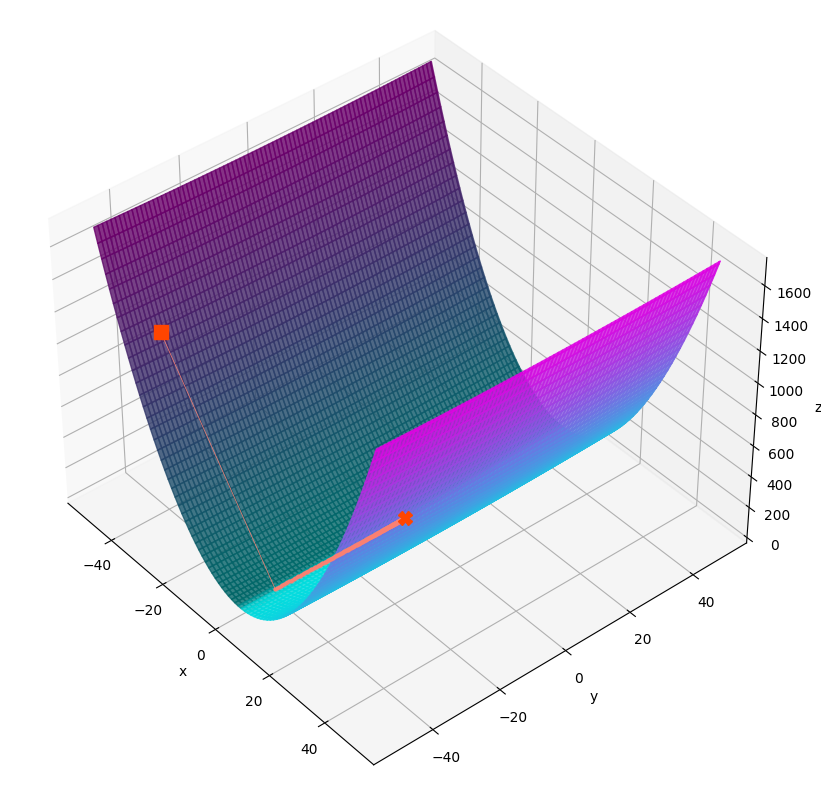

In [286]:
x = [-40, -40]

diag = generate_function(2, 100)
points = gradient_descent_with_multidim_golden_ratio(function, x, grad_func, diag)

print(points[-1])
draw_3d_function(-50, 50, points, -40, 10, 40, function, diag)

## зависимость числа итераций T(n, k), необходимых градиентному спуску для сходимости от размерности пространства $n$ и числа обусловленности $k$ целевой функции

In [287]:
count = 0

result = [[0 for _ in range(20)] for _ in range(20)]

step = 50

for iter in range(0, 4):
  for n in range(2, 1000, step):
    print(n)
    for k in range(1, 1000, step):
      x = [-40 for _ in range(n)]
      diag = generate_function(n, k)
      gradient_descent_with_golden_ratio(random_function, x, grad_random_function, diag)
      result[19 - (n//step)][k//step] += count
      count = 0

for i in range(len(result)):
  for j in range(len(result)):
    result[i][j] = result[i][j] / step

plt.rcParams["figure.figsize"] = (25, 25)
fig, ax = plt.subplots()
im = ax.imshow(result, cmap="cool")
cbar = ax.figure.colorbar(im, ax=ax, shrink=0.5)

dots = [i for i in range(2, 1000, step)]

ax.set_xticks(np.arange(len(dots)), labels=dots)
dots.reverse()
ax.set_yticks(np.arange(len(dots)), labels=dots)
result = np.array(result)
for i in range(len(result)):
    for j in range(len(result)):
        text = ax.text(j, i, result[i, j],
                       ha="center", va="center")

plt.xlabel('k')
plt.ylabel('n')


print(count)

2
52


KeyboardInterrupt: ignored

In [ ]:
# доп задание

In [ ]:
## Одномерный поиск с учетом условий Вольфе

In [ ]:
def first_condition(f, x, grad, alpha, c1):
  x1 = x - alpha * np.array(grad(x[0], x[1]))
  if f(x1[0], x1[1]) <= f(x[0], x[1]) + c1 * alpha * np.dot(np.array(grad(x[0], x[1])), -np.array(grad(x[0], x[1]))):
    return True
  else:
    return False

def second_condition(f, x, grad, alpha, c2):
  x1 = x - alpha * np.array(grad(x[0], x[1]))
  if np.dot(np.array(grad(x1[0], x1[1])), -np.array(grad(x[0], x[1]))) >= c2 * np.dot(np.array(grad(x[0], x[1])), -np.array(grad(x[0], x[1]))):
    return True
  else:
    return False

def wolfe_method(f, x, grad, c1=1e-4, c2=0.9):
    alpha = 100
    while not first_condition(f, x, grad, alpha, c1) or not second_condition(f, x, grad, alpha, c2):
      alpha = alpha * 0.9
    return alpha


## Градиентный спуск на основе одномерного поиска с учетом условий Вольфе

In [ ]:
def gradient_descent_with_wolfe(f, x, grad_f):
    points = [x]
    lr = wolfe_method(f, x, grad_f)
    x = x - lr * np.array(grad_f(x[0], x[1]))
    points.append(x)
    while check_points(points[-2], points[-1]):
        lr = wolfe_method(f, x, grad_f)
        x = x - lr * np.array(grad_f(x[0], x[1]))
        points.append(x)

    return points

## тест

[1.87986894e-07 4.53840509e-07]


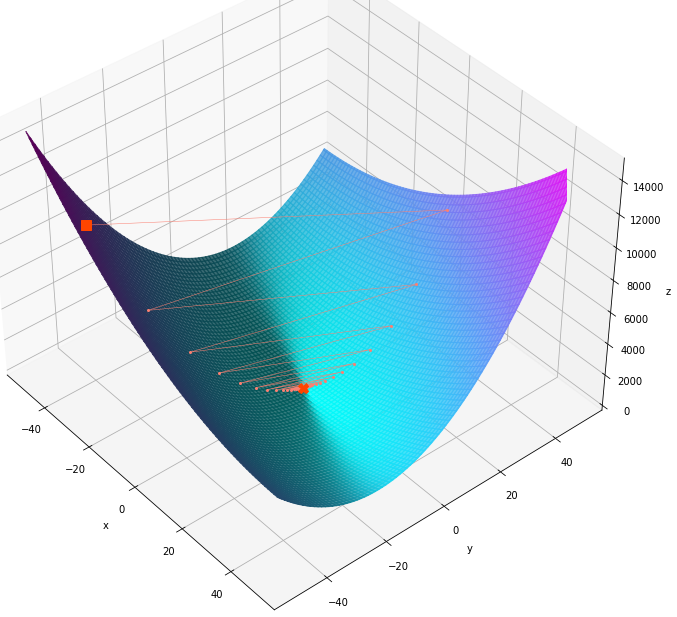

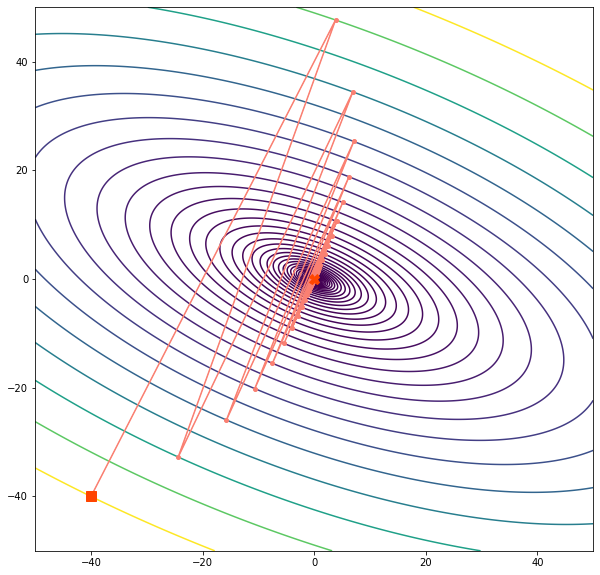

In [ ]:
x = [-40, -40]
points = gradient_descent_with_wolfe(f3, x, grad3)
print(points[-1])
draw_3d_function(-50, 50, points, -40, 8, 40, f3)
draw_lines_of_level(points, f3)